# Load Tracks

In [1]:
import sys
sys.path.insert(0, '/home/student.unimelb.edu.au/shorte1/Documents/TINT')

In [31]:
# Core
import datetime
import os
import glob
import tempfile
import pickle
import copy

# Analysis
import numpy as np
import pandas as pd
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl

# Debugging
import pdb, traceback
# %load_ext line_profiler

# Radar Tools
import pyart
import tint
# import tint.animate
# from tint.visualisation import animate

import CPOL_func as cf
import caine_func as caf
import classification as cl
import analysis

# Convenience functions
%load_ext autoreload
%autoreload 1
%aimport CPOL_func
%aimport caine_func
%aimport tint.visualisation.figures
%aimport tint.visualisation.animate
%aimport tint.visualisation.horizontal_helpers
%aimport tint.visualisation.vertical_helpers
%aimport tint.tracks
%aimport tint.objects
%aimport tint.grid_utils
%aimport tint.steiner
%aimport tint.matching
%aimport tint.rain
%aimport tint.cells
%aimport tint.tracks_helpers
%aimport tint.process_ERA5
%aimport tint.process_WRF

%pdb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Automatic pdb calling has been turned ON


In [3]:
base_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/CPOL/'
save_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_tracks/'
fig_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures/'
ERA5_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/era5/'
ERA5_dir += 'pressure-levels/reanalysis/'
WRF_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/caine_WRF_data/'

In [4]:
with open(save_dir + '/lin.pkl', 'rb') as f:
    lin_tracks_obj = pickle.load(f)
with open(save_dir + '/thompson.pkl', 'rb') as f:
    thompson_tracks_obj = pickle.load(f)

In [5]:
micro_physics = 'lin'

dates = np.arange(
    np.datetime64('2006-02-08 12:00'), 
    np.datetime64('2006-02-13 10:10'),
    np.timedelta64(10, 'm'))

filenames, start_time, end_time = caf.caine_files_from_datetime_list(
    dates, micro_physics=micro_physics, 
    base_dir=WRF_dir)

tracks_obj  = tint.Tracks(params={
    'AMBIENT': 'WRF', 'AMBIENT_BASE_DIR': WRF_dir + 'lind02/'})

Gathering files.


In [12]:
micro_physics = 'thompson'

dates = np.arange(
    np.datetime64('2006-02-08 12:00'), 
    np.datetime64('2006-02-13 10:10'),
    np.timedelta64(10, 'm'))

filenames, start_time, end_time = caf.caine_files_from_datetime_list(
    dates, micro_physics=micro_physics, 
    base_dir=WRF_dir)

tracks_obj  = tint.Tracks(params={
    'AMBIENT': 'WRF', 'AMBIENT_BASE_DIR': WRF_dir + 'thompsond02/'})

Gathering files.


Generating frame 2006-02-09T09:00:00.000000000
Interpolating onto line coordinates.


KeyboardInterrupt: 

> /home/student.unimelb.edu.au/shorte1/anaconda3/envs/CPOL_analysis/lib/python3.8/site-packages/scipy/interpolate/ndgriddata.py(220)griddata()
    218         ip = LinearNDInterpolator(points, values, fill_value=fill_value,
    219                                   rescale=rescale)
--> 220         return ip(xi)
    221     elif method == 'cubic' and ndim == 2:
    222         ip = CloughTocher2DInterpolator(points, values, fill_value=fill_value,

ipdb> q


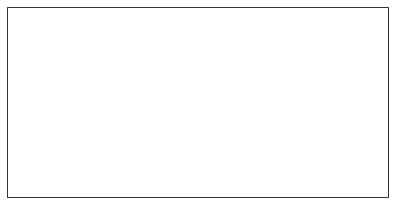

In [16]:
for uid_ind in np.arange(1,2).astype(str):
    fig_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures'

    params = {
        'uid_ind': uid_ind, 'line_coords': True, 'center_cell': False, 
        'cell_ind': 7, 'winds': True, 'winds_fn': filenames, 
        'direction': 'perpendicular', 'crosshair': True, 'save_dir': fig_dir,
        'line_average': True, 'streamplot': True, 'relative_winds': True,
        'data_fn': 'angles', 'load_line_coords_winds': False, 
        'save_ds': False}

    grids = (
        pyart.io.read_grid(fn, include_fields = ['reflectivity'])
        for fn in filenames)

    tint.visualisation.animate.animate(lin_tracks_obj, grids, params)

In [9]:
filenames[59]

"/media/shorte1/Ewan's Hard Drive/phd/data/caine_WRF_data/lind04_ref/lind04_ref_2006-02-09T09:50:00.nc"

In [19]:
fig_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures'

params = {
    'uid_ind': '1', 'line_coords': True, 'center_cell': False, 
    'cell_ind': 7, 'winds': True, 'winds_fn': filenames[59], 
    'direction': 'perpendicular', 'crosshair': True, 'save_dir': fig_dir,
    'line_average': True, 'streamplot': True, 'relative_winds': True,
    'data_fn': 'angles', 'load_line_coords_winds': False, 
    'save_ds': False, 'fontsize': 14}

grid = pyart.io.read_grid(filenames[59], include_fields = ['reflectivity'])

tint.visualisation.figures.vertical_cross_section(lin_tracks_obj, grid, params)
plt.savefig(
    fig_dir + '/example_vertical_cs.png', dpi=200, facecolor='w', 
    edgecolor='white', bbox_inches='tight')

Interpolating onto line coordinates.
Calculating horizontal winds in new basis.
Adding reflectivity.
Adding stratiform offset.
Adding winds.
Saving data.


<Figure size 432x288 with 0 Axes>

In [18]:
tint.visualisation.figures.concat_angles(
    '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures/thompson_objects_redone',
    '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures/thompson_angles_redone.csv',
    13)

,time,uid,streamline_angle,w_max,n_angles,n_obs,max_count,stratiform_offset_angle
0,2006-02-09 11:50:00,0,146.25,4.668671,95.0,410.0,8.0,82.234698
1,2006-02-09 12:00:00,0,61.25,4.576411,88.0,369.0,5.0,80.578293
2,2006-02-09 12:10:00,0,158.75,4.136692,118.0,410.0,11.0,151.021723
3,2006-02-09 12:20:00,0,138.75,3.549116,91.0,369.0,6.0,151.277804
4,2006-02-09 12:30:00,0,148.75,2.846088,67.0,369.0,8.0,153.164611
...,...,...,...,...,...,...,...,...
7,2006-02-12 12:00:00,13,NaN,0.112685,0.0,779.0,NaN,148.929352
8,2006-02-12 12:10:00,13,153.75,1.611473,14.0,738.0,3.0,154.350060
9,2006-02-12 12:20:00,13,NaN,0.078730,0.0,779.0,NaN,151.457799
10,2006-02-12 12:30:00,13,158.75,1.714548,17.0,820.0,4.0,152.326968


## Paper

In [6]:
lin_angles = pd.read_csv(
    fig_dir + '/lin_angles_redone.csv').dropna()
thompson_angles = pd.read_csv(
    fig_dir + '/thompson_angles_redone.csv').dropna()

In [46]:
star = lin_angles.loc[lin_angles['time'] == '2006-02-09 09:50:00']
star_sl = star['streamline_angle'].values[0]
star_so = star['stratiform_offset_angle'].values[0]

,Unnamed: 0,time,uid,streamline_angle,w_max,n_angles,n_obs,max_count,stratiform_offset_angle
13,5,2006-02-09 09:50:00,1,168.75,2.854924,175.0,902.0,31.0,153.542009


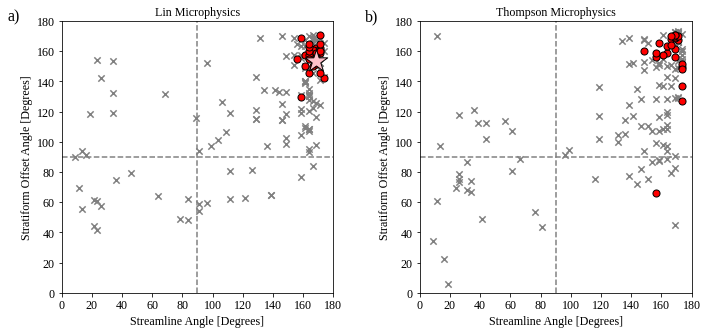

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Lin
angle_diff, X, names = tint.visualisation.figures.get_angle_props(
    lin_angles, lin_tracks_obj)

sl_angles = lin_angles['streamline_angle'].values
so_angles = lin_angles['stratiform_offset_angle'].values

[
    w_max, ratio_angles, ratio_bin, ratio_border_conv, 
    ratio_border_strat, area_conv, area_strat, eccentricity, 
    speed] = [X[:,i] for i in range(X.shape[1])]

# Combined criteria
cond2 = ratio_angles > 0.1
cond3 = ratio_bin > 0.1
cond4 = area_conv > 2000
cond4 = area_strat > 2000
cond = cond2 & cond3 & cond4

tint.visualisation.figures.angle_correlation(
    sl_angles, so_angles, cond, fig_dir + 'test.png', 
    fig=fig, ax=axes[0], title='Lin Microphysics')

axes[0].scatter(
    star_sl, star_so, marker='*', color='pink', edgecolor='k', 
    s=560, zorder=4)

# Thompson
angle_diff, X, names = tint.visualisation.figures.get_angle_props(
    thompson_angles, thompson_tracks_obj)

sl_angles = thompson_angles['streamline_angle'].values
so_angles = thompson_angles['stratiform_offset_angle'].values

[
        w_max, ratio_angles, ratio_bin, ratio_border_conv, 
        ratio_border_strat, area_conv, area_strat, eccentricity, 
        speed] = [X[:,i] for i in range(X.shape[1])]

# Combined criteria
cond2 = ratio_angles > 0.1
cond3 = ratio_bin > 0.1
cond4 = area_conv > 2000
cond4 = area_strat > 2000
cond = cond2 & cond3 & cond4

tint.visualisation.figures.angle_correlation(
    sl_angles, so_angles, cond, fig_dir + 'thompson_correlation.png', 
    fig=fig, ax=axes[1], title='Thompson Microphysics')

cl.make_subplot_labels(axes.flatten(), x_shift=-0.2)

plt.subplots_adjust(wspace=.15)

plt.savefig(
    fig_dir + 'correlations.png', dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')

In [66]:
buffer = 10

hit = np.logical_and(sl_angles > 90+buffer, so_angles > 90+buffer).sum()
hit += np.logical_and(sl_angles < 90-buffer, so_angles < 90-buffer).sum()

miss = np.logical_and(sl_angles > 90+buffer, so_angles < 90-buffer).sum()
miss += np.logical_and(sl_angles < 90-buffer, so_angles > 90+buffer).sum()

print(hit, miss, hit/(hit+miss))

138 12 0.92


In [67]:
# Single
angle_diff, X, names = tint.visualisation.figures.get_angle_props(
    thompson_angles, thompson_tracks_obj)

sl_angles = thompson_angles['streamline_angle'].values
so_angles = thompson_angles['stratiform_offset_angle'].values

[
        w_max, ratio_angles, ratio_bin, ratio_border_conv, 
        ratio_border_strat, area_conv, area_strat, eccentricity, 
        speed] = [X[:,i] for i in range(X.shape[1])]

# Combined criteria
cond2 = ratio_angles > 0.1
cond3 = ratio_bin > 0.1
cond4 = area_conv > 2000
cond4 = area_strat > 2000
cond = cond2 & cond3 & cond4

tint.visualisation.figures.angle_correlation(
    sl_angles, so_angles, cond, fig_dir + 'thompson_correlation.png')

In [71]:
buffer = 10

hit = np.logical_and(sl_angles > 90+buffer, so_angles > 90+buffer).sum()
hit += np.logical_and(sl_angles < 90-buffer, so_angles < 90-buffer).sum()

miss = np.logical_and(sl_angles > 90+buffer, so_angles < 90-buffer).sum()
miss += np.logical_and(sl_angles < 90-buffer, so_angles > 90+buffer).sum()

print(hit, miss, hit/(miss+hit))

118 15 0.8872180451127819


## Exploration

In [23]:
# Combined
angle_diff_t, X_t, names = tint.visualisation.figures.get_angle_props(
    thompson_angles, thompson_tracks_obj)
angle_diff_l, X_l, names = tint.visualisation.figures.get_angle_props(
    lin_angles, lin_tracks_obj)
angle_diff = np.concatenate([angle_diff_t, angle_diff_l])
X = np.concatenate([X_t, X_l])
sl_angles_t = thompson_angles['streamline_angle'].values
so_angles_t = thompson_angles['stratiform_offset_angle'].values
sl_angles_l = lin_angles['streamline_angle'].values
so_angles_l = lin_angles['stratiform_offset_angle'].values
sl_angles = np.concatenate([sl_angles_t, sl_angles_l])
so_angles = np.concatenate([so_angles_t, so_angles_l])

In [27]:
[
        w_max, ratio_angles, ratio_bin, ratio_border_conv, 
        ratio_border_strat, area_conv, area_strat, eccentricity, 
        speed] = [X[:,i] for i in range(X.shape[1])]

In [24]:
from sklearn import tree                       
clf = tree.DecisionTreeRegressor(min_samples_split=.25)
clf.fit(X, angle_diff)

DecisionTreeRegressor(min_samples_split=0.25)

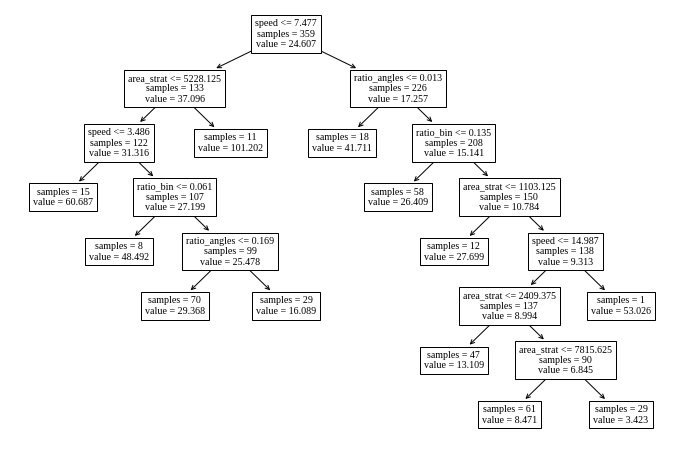

In [25]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
tree.plot_tree(
    clf, max_depth=10, ax=ax, feature_names=names, fontsize=10, 
    label='all', impurity=False)
fig.savefig(fig_dir + 'tree_combined.pdf', facecolor='w', format='pdf')

In [28]:
# Combined criteria
cond1 = (speed <= 7.477) & (area_strat <= 5228.125) & (speed > 3.486) & (ratio_bin > 0.061) & (ratio_angles > 0.169)
cond2 = (speed > 7.477) & (ratio_angles > 0.013) & (ratio_bin > 0.135) & (area_strat > 1103)
cond = cond1 | cond2

In [53]:
# Combined criteria
cond1 = speed > 7.5
cond2 = ratio_angles > 0.013
cond3 = ratio_bin > 0.135
cond5 = np.array(area_strat) > 2409
cond6 = speed <= 14.987
cond7 = np.array(ratio_border_conv) <= 0.037
cond8 = np.array(area_conv) > 325.0
# cond = cond1 & cond2 & cond3 & cond5 # & cond7
cond = cond1 & cond2 & cond3 & cond5 & cond6

In [569]:
# Thompson split criteria
cond1 = speed > 7.568
cond2 = ratio_angles > 0.013
cond3 = ratio_bin > 0.082
cond4 = speed <= 14.987
cond5 = np.array(area_strat) > 1650
cond6 = np.array(ratio_border_conv) <= 0.037
cond7 = np.array(area_conv) > 325.0
cond = cond1 & cond2 & cond3 & cond4 # & cond5 & cond7

In [524]:
cond1a = (ratio_angles <= 0.021)
cond1b = (ratio_angles > 0.021) & (ratio_bin <= 0.213)
cond1 = (speed <= 7.568) & (ratio_angles > 0.001) & (ratio_bin > 0.055) & (speed > 4.93) & (cond1a | cond1b)
cond2a = (speed <= 10.09)
cond2b = (speed > 10.09) & (ratio_bin > 0.137)
cond2 = (speed > 7.568) & (ratio_angles > 0.013) & (ratio_bin > 0.082) & (speed <= 14.987) & (cond2a | cond2b)
cond = cond1 | cond2

In [374]:
# Lin split criteria
cond1 = speed > 0
cond2 = ratio_angles > 0.011
cond3 = ratio_bin > 0.127
cond4 = w_max > 1
cond = cond1 & cond2 & cond3 & cond4

In [386]:
# Lin split criteria
cond1 = (ratio_bin > 0.221) & (speed > 6.943) & (eccentricity > 0.679)
cond2 = (
    (ratio_bin <= 0.221) & (ratio_angles > 0.011) & (w_max > 2.243)
    & (
        ((ratio_bin > 0.116) & (speed > 3.676)) 
        | ((ratio_bin <= 0.113) & (ratio_bin > 0.049))))
cond = cond1 | cond2

In [534]:
len(cond[cond==True])

51

In [29]:
from scipy.stats.stats import pearsonr 


In [15]:
np.rad2deg(np.arctan2(5.5,-30))

169.6111421845304

In [18]:
from skimage.transform import radon
from skimage.io import imread
from skimage.color import rgb2gray, rgba2rgb

In [25]:
test = (image == 0).astype(int)

In [29]:
filename = filenames[36]
grid = pyart.io.read_grid(filename, include_fields = ['reflectivity'])
fig_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures'

params = {
    'uid_ind': '1', 'line_coords': False, 'center_cell': False, 
    'cell_ind': 4, 'winds': False, 'winds_fn': filename,
    'crosshair': True, 'save_dir': None, 'legend': False}

tint.visualisation.figures.object(tracks_obj, grid, params=params)

IndexError: list index out of range

> /tmp/ipykernel_21199/4030395361.py(1)<module>()
----> 1 filename = filenames[36]
      2 grid = pyart.io.read_grid(filename, include_fields = ['reflectivity'])
      3 fig_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures'
      4 
      5 params = {

ipdb> q
